<a href="https://colab.research.google.com/github/Puneeth006/Deep_Learning_Fundamentals/blob/main/Perceptron_Pima_Indian_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 - Deep Learning Fundamentals

<br/>

## 1. Imports

In [ ]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib as mpl
import matplotlib.pyplot as plt  # For creating visualizations

# Adjusting visualization settings
mpl.rc('axes', labelsize=7)  # Setting label font size for plots
mpl.rc('xtick', labelsize=6)  # Setting x-axis tick label font size
mpl.rc('ytick', labelsize=6)  # Setting y-axis tick label font size
mpl.rc('figure', dpi=240)  # Setting the resolution (dots per inch) for figures
plt.close('all')  # Closing all open plots

import seaborn as sns  # For enhanced visualization capabilities

# Importing a specific function 'train_test_split' from the module 'model_selection' in the scikit-learn library
from sklearn.model_selection import train_test_split

# Import GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Importing machine learning classifiers
from sklearn.linear_model import Perceptron  # For a Perceptron classifier
from sklearn.neural_network import MLPClassifier  # For a Multi-Layer Perceptron classifier

# Import metrics for evaluating model performance
from sklearn.metrics import (
    classification_report,         # Generate classification report
    confusion_matrix,              # Compute confusion matrix
    roc_curve,                     # Generate ROC curve
    balanced_accuracy_score,       # Compute balanced accuracy score
    recall_score,                  # Calculate recall score
    precision_score,               # Calculate precision score
    roc_auc_score,                 # Compute ROC AUC score
    f1_score,                      # Calculate F1 score
    make_scorer                    # Create a custom scoring function
)

<br/>

## 2. Load and Clean the Data

Load the data 'diabetes_scale' from https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary.html

The data obtained is requires cleaning:
* Renaming columns
* Removing extra string part
* Convert dtype to float
* Remove rows with missing values

In [ ]:
# Specify the URL of the CSV file
url = 'https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/diabetes_scale'

# Read the CSV data into a DataFrame
diabetes_data = pd.read_csv(url, sep=' ', header=None)

# Obtain the required features
diabetes_data = diabetes_data.iloc[:,0:9]

# Rename the columns as per the original dataset
diabetes_data.columns = ["outcome", "pregnancies", "glucose", "blood_pressure", "skin_thickness",
                         "insulin", "bmi", "diabetes_pedigree_function", "age"]

# Display the first 10 rows of the DataFrame
diabetes_data.head(10)

,outcome,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age
0,-1,1:-0.294118,2:0.487437,3:0.180328,4:-0.292929,5:-1,6:0.00149028,7:-0.53117,8:-0.0333333
1,1,1:-0.882353,2:-0.145729,3:0.0819672,4:-0.414141,5:-1,6:-0.207153,7:-0.766866,8:-0.666667
2,-1,1:-0.0588235,2:0.839196,3:0.0491803,4:-1,5:-1,6:-0.305514,7:-0.492741,8:-0.633333
3,1,1:-0.882353,2:-0.105528,3:0.0819672,4:-0.535354,5:-0.777778,6:-0.162444,7:-0.923997,8:-1
4,-1,1:-1,2:0.376884,3:-0.344262,4:-0.292929,5:-0.602837,6:0.28465,7:0.887276,8:-0.6
5,1,1:-0.411765,2:0.165829,3:0.213115,4:-1,5:-1,6:-0.23696,7:-0.894962,8:-0.7
6,-1,1:-0.647059,2:-0.21608,3:-0.180328,4:-0.353535,5:-0.791962,6:-0.0760059,7:-0.854825,8:-0.833333
7,1,1:0.176471,2:0.155779,3:-1,4:-1,5:-1,6:0.052161,7:-0.952178,8:-0.733333
8,-1,1:-0.764706,2:0.979899,3:0.147541,4:-0.0909091,5:0.283688,6:-0.0909091,7:-0.931682,8:0.0666667
9,-1,1:-0.0588235,2:0.256281,3:0.57377,4:-1,5:-1,6:-1,7:-0.868488,8:0.1


In [ ]:
# Loop through columns starting from the second column (index 1)
for i in diabetes_data.columns[1:]:
    # Remove the first two characters from each entry in the selected column
    diabetes_data[i] = diabetes_data[i].str[2:]

# Display the first 10 rows of the DataFrame to check the changes
diabetes_data.head(10)

,outcome,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age
0,-1,-0.294118,0.487437,0.180328,-0.292929,-1,0.00149028,-0.53117,-0.0333333
1,1,-0.882353,-0.145729,0.0819672,-0.414141,-1,-0.207153,-0.766866,-0.666667
2,-1,-0.0588235,0.839196,0.0491803,-1,-1,-0.305514,-0.492741,-0.633333
3,1,-0.882353,-0.105528,0.0819672,-0.535354,-0.777778,-0.162444,-0.923997,-1
4,-1,-1,0.376884,-0.344262,-0.292929,-0.602837,0.28465,0.887276,-0.6
5,1,-0.411765,0.165829,0.213115,-1,-1,-0.23696,-0.894962,-0.7
6,-1,-0.647059,-0.21608,-0.180328,-0.353535,-0.791962,-0.0760059,-0.854825,-0.833333
7,1,0.176471,0.155779,-1,-1,-1,0.052161,-0.952178,-0.733333
8,-1,-0.764706,0.979899,0.147541,-0.0909091,0.283688,-0.0909091,-0.931682,0.0666667
9,-1,-0.0588235,0.256281,0.57377,-1,-1,-1,-0.868488,0.1


In [ ]:
# Loop through all columns except the first one and convert their data type to float
for i in diabetes_data.columns[1:]:
  diabetes_data[i] = diabetes_data[i].astype(float)

# Display the data types of each column after the conversion
diabetes_data.dtypes

outcome                         int64
pregnancies                   float64
glucose                       float64
blood_pressure                float64
skin_thickness                float64
insulin                       float64
bmi                           float64
diabetes_pedigree_function    float64
age                           float64
dtype: object

In [ ]:
# Check for rows with any missing values
diabetes_data[diabetes_data.isnull().any(axis=1)]

,outcome,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age
14,-1,-0.411765,0.668342,0.180328,-0.616162,-0.586288,-0.230999,-0.565329,NaN
24,-1,0.294118,0.437186,0.540984,-0.333333,-0.654846,0.090909,-0.849701,NaN
236,-1,-0.176471,0.819095,0.377049,-0.575758,-0.546099,0.070045,-0.566183,NaN
259,-1,0.294118,0.557789,0.245902,-0.434343,-0.645390,-0.007452,0.088813,NaN
285,1,-0.176471,0.366834,0.213115,-0.474747,-0.680851,-0.225037,-0.514091,NaN
401,1,-0.294118,0.376884,-1.000000,-1.000000,-0.278688,-0.937660,0.133333,NaN
458,-1,0.176471,0.487437,0.377049,-0.030303,-0.439716,0.120715,-0.211785,NaN
517,1,-0.176471,0.256281,0.409836,-1.000000,-1.000000,0.120715,-0.807003,NaN
658,1,0.294118,0.276382,0.737705,-1.000000,-1.000000,0.162444,-0.904355,NaN


**Note:** In the diabetes_scale dataset, there are 9 rows with missing values specifically in the age column. Given that these 9 rows represent a very small portion (≈1%) of the total dataset, it is reasonable to consider removing them from the dataset.

In [ ]:
# Drop rows with missing values
diabetes_data.dropna(inplace = True)

<br/>

**Note: The provided data has already undergone preprocessing as mentioned, so there's no need for any extra preprocessing steps.**

<br/>

## 3. Exploratory Data Analysis

In [ ]:
# Check the shape of the 'diabetes_data' DataFrame to get the number of rows and columns.
diabetes_data.shape

(759, 9)

There are 759 rows and 9 columns present in the dataset

In [ ]:
# General information about the dataframe
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   outcome                     759 non-null    int64  
 1   pregnancies                 759 non-null    float64
 2   glucose                     759 non-null    float64
 3   blood_pressure              759 non-null    float64
 4   skin_thickness              759 non-null    float64
 5   insulin                     759 non-null    float64
 6   bmi                         759 non-null    float64
 7   diabetes_pedigree_function  759 non-null    float64
 8   age                         759 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 59.3 KB


**Analysis:**
* There 9 variables in the dataset
  * Outcome is a integer
  * Remaining all variables are floating type
* There are no null values in the current dataset

In [ ]:
# Generate summary statistics for the diabetes_data DataFrame
# This provides statistical information like mean, standard deviation, min, max, and quartiles for each column.
diabetes_data.describe()

,outcome,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000
mean,0.306983,-0.553902,0.211976,0.130392,-0.584860,-0.812335,-0.046738,-0.664571,-0.599166
std,0.952343,0.393479,0.321448,0.317587,0.322290,0.273006,0.235680,0.282291,0.388652
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-0.882353,-0.005025,0.016393,-1.000000,-1.000000,-0.186289,-0.858668,-0.900000
50%,1.000000,-0.647059,0.165829,0.180328,-0.535354,-0.940898,-0.046200,-0.749787,-0.733333
75%,1.000000,-0.294118,0.407035,0.311475,-0.353535,-0.703310,0.087929,-0.532878,-0.366667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Count of each kind of data in the given dataset

# Calculate and store the count of unique values in the 'Target' column of the 'diabetes_data' dataset.
response_prop = diabetes_data.outcome.value_counts()

# Display the resulting counts, which represent the distribution of different values in the 'Target' column.
response_prop

 1    496
-1    263
Name: outcome, dtype: int64

There are 496 diabetic and 263 non diabetic enties in the given dataset

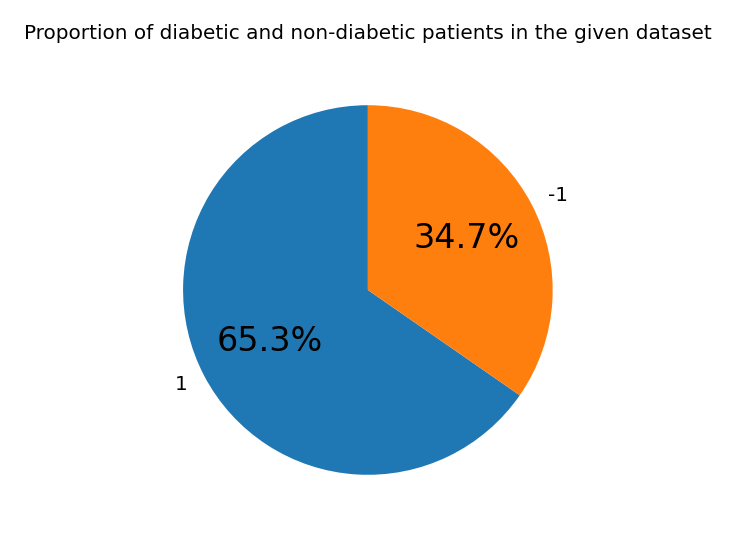

In [ ]:
# Import the necessary library for creating plots
import matplotlib.pyplot as plt

# Use matplotlib to create a pie chart
# Create a figure and axis (subplots) with a specific size
fig, ax = plt.subplots(figsize=(2.5, 2.5))

# Create a pie chart
# Use data from 'response_prop' to create the chart
# 'labels' parameter specifies the labels for each pie slice
# 'autopct' parameter specifies the format for displaying percentages on the chart
# 'startangle' parameter specifies the angle at which the pie chart starts
ax.pie(response_prop, labels=response_prop.index, autopct='%1.1f%%', startangle=90)

# Ensure equal aspect ratio to make the pie chart circular
ax.set_aspect('equal')

# Set a title for the pie chart with a specific font size
ax.set_title('Proportion of diabetic and non-diabetic patients in the given dataset', fontsize=6)

# Display the pie chart
plt.show()

**Note: The dataset has a noticeable imbalance, with 65.3% of individuals having diabetes, while only 34.7% do not. This means that traditional metrics like Accuracy are not suitable for assessing imbalanced datasets. Instead, metrics such as balanced accuracy and the F1 score are more appropriate choices for evaluating datasets with such an imbalance.**

<br/>

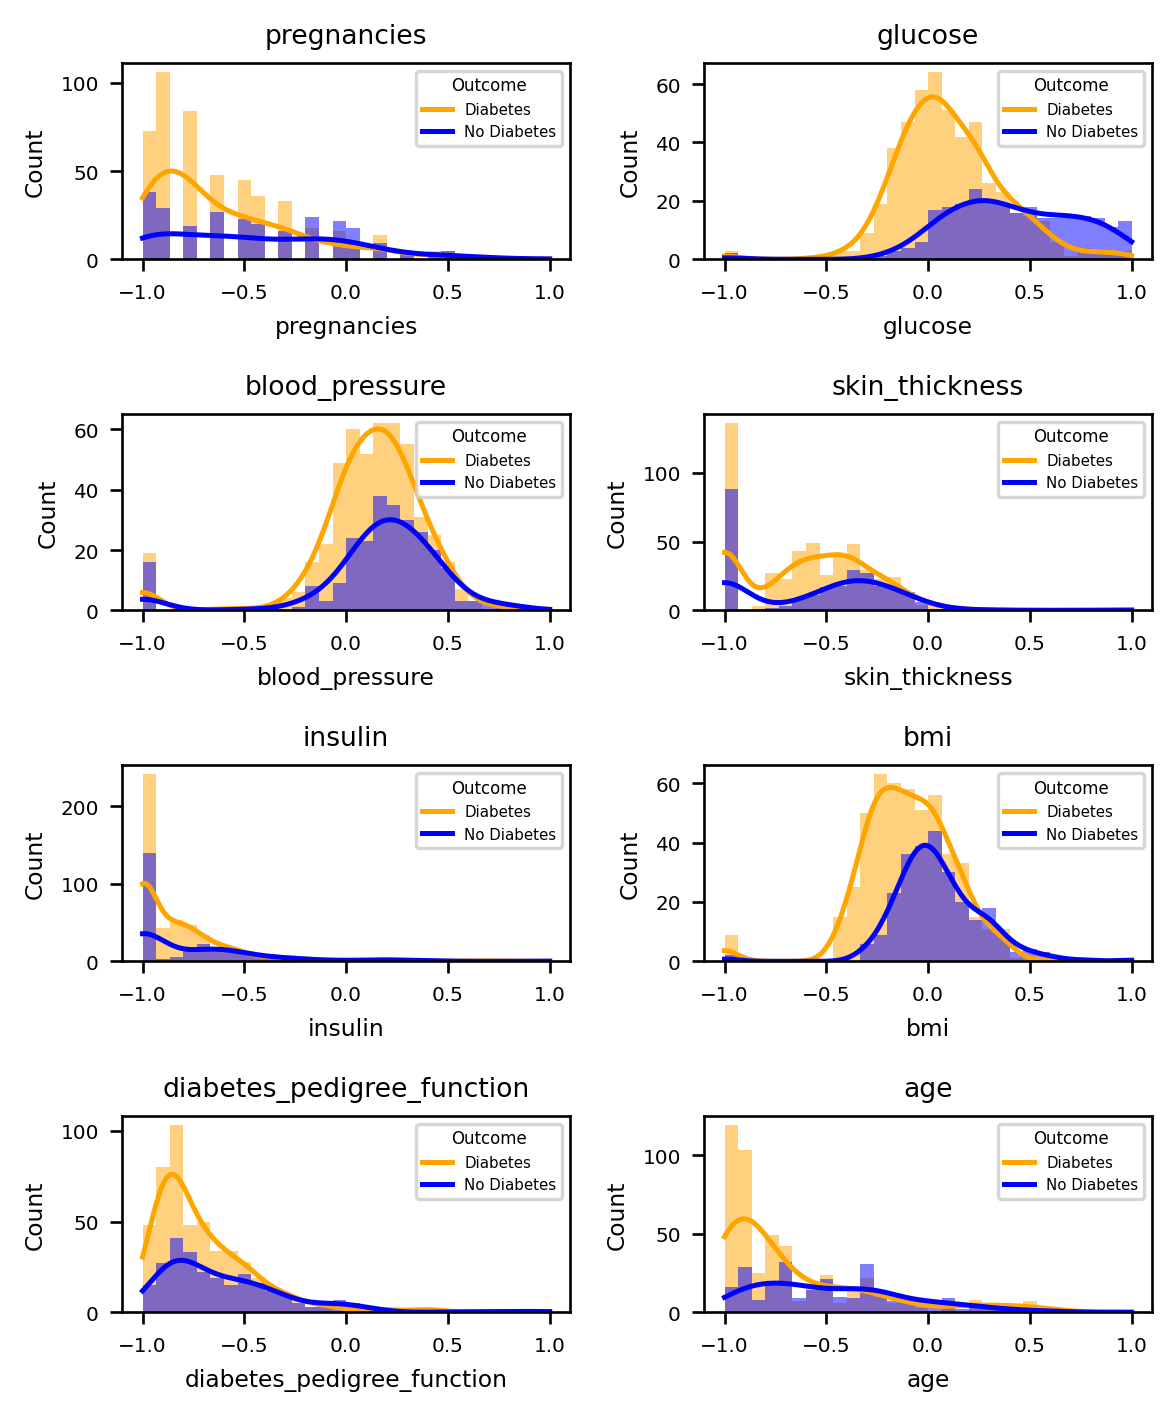

In [ ]:
def generate_histograms():
    """
    Generate histograms ordered in rows and columns for diabetes dataset.

    This function creates subplots in a grid, plots histograms for each feature,
    and customizes the legend for diabetes and non-diabetes outcomes.

    Returns:
        None
    """

    # Define the number of rows and columns for the subplot grid
    Nrows = 4
    Ncols = 2

    # Create the subplot grid
    fig, axes = plt.subplots(Nrows, Ncols, figsize=(5, 6))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Define legend labels
    legend_labels = ["Diabetes", "No Diabetes"]

    # Loop over the subplots and plot the histograms
    for i, column in enumerate(diabetes_data.columns[1:]):
        # Determine the row and column index for the current subplot
        row = i // Ncols
        col = i % Ncols

        # Plot the histogram on the current subplot with different colors
        sns.histplot(data=diabetes_data, hue="outcome", x=column, bins=30, kde=True, ax=axes[i], edgecolor=None, palette=["blue", "orange"])

        # Set the subplot title
        axes[i].set_title(column, fontsize=8)

        # Customize the legend size and labels
        legend = axes[i].legend(legend_labels, fontsize=4.5, title="Outcome", title_fontsize=5, loc="upper right")

    # Adjust the layout to prevent subplot overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example usage
generate_histograms()


**Analysis:**

BMI and glucose appear to be the main predictors in determining a person to be diabetic or not

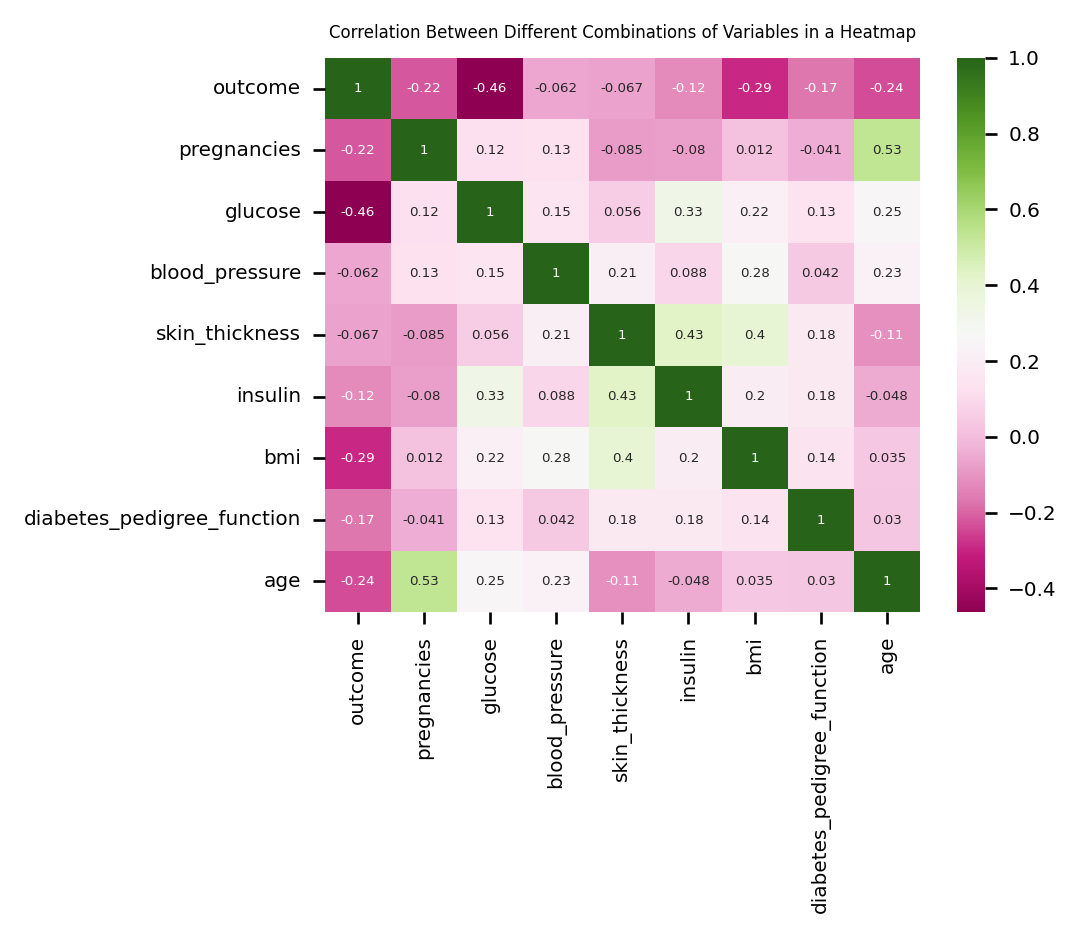

In [ ]:
# Calculate the correlation matrix for the diabetes_data dataset
correlation_matrix = diabetes_data.corr()

# Create a figure for the heatmap and set its size
plt.figure(figsize=(4, 3))

# Generate the heatmap to visualize the correlation between variables
# 'annot=True' displays the correlation values on the heatmap
# 'cmap="PiYG"' sets the color map to Pink-Yellow-Green for better visualization
# 'annot_kws={"size": 4}' reduces the fontsize of annotations
sns.heatmap(correlation_matrix, annot=True, cmap="PiYG", annot_kws={"size": 4})

# Set the title for the heatmap
plt.title("Correlation Between Different Combinations of Variables in a Heatmap", fontsize=5)

# Display the heatmap
plt.show()

**Analysis:**

The variables 'age' and 'pregnancies' exhibit a moderate positive correlation, while the variables 'outcome' and 'glucose' display a moderate negative correlation. The remaining correlations do not show significant associations.


<br/>

# 4. Training Machine Learning Models

In [ ]:
# Split the data into test and train datasets using train_test_split with train:test = 70:30
# The train_test_split function takes the 'diabetes_data' dataset and splits it into two sets, one for training and one for testing.
# 'test_size = 0.3' specifies that 30% of the data will be used for testing.
# 'stratify = diabetes_data.Target' ensures that the target variable 'outcome' is used for stratified sampling, maintaining class proportions.
train, test = train_test_split(diabetes_data, test_size = 0.3, random_state = 42,
                               stratify = diabetes_data.outcome)

# Verify size and proportion for the splits
# Print information about the training dataset, including its shape (number of rows and columns) and class distribution.
print("Train set - shape and proportion -", train.shape, "\n",train.outcome.value_counts(), "\n")

# Print information about the testing dataset, including its shape (number of rows and columns) and class distribution.
print("Test set - shape and proportion -", test.shape, "\n", test.outcome.value_counts())

Train set - shape and proportion - (531, 9) 
  1    347
-1    184
Name: outcome, dtype: int64 

Test set - shape and proportion - (228, 9) 
  1    149
-1     79
Name: outcome, dtype: int64


In [ ]:
# Obtain X_train, y_train, X_test, y_test

# Extract the features (independent variables) for the training dataset.
# X_train will contain all columns from the 'train' DataFrame except the 'outcome' column.
X_train = train.drop(["outcome"], axis=1)

# Extract the target variable for the training dataset.
# y_train will contain the 'Target' column values from the 'outcome' DataFrame.
y_train = train["outcome"].copy()

# Extract the features (independent variables) for the testing dataset.
# X_test will contain all columns from the 'test' DataFrame except the 'outcome' column.
X_test = test.drop(["outcome"], axis=1)

# Extract the target variable for the testing dataset.
# y_test will contain the 'outcome' column values from the 'test' DataFrame.
y_test = test["outcome"].copy()

In [ ]:
# data frame to store model test performances
train_data_performance = pd.DataFrame(columns = ['model', 'balanced_accuracy', 'f1_score', 'auc'])

In [ ]:
# data frame to store model test performances
test_data_performance = pd.DataFrame(columns = ['model', 'balanced_accuracy', 'f1_score', 'auc'])

In [ ]:
# Function to return balanced accuracy score
def get_balanced_accuracy(yt,yp):
    return round(balanced_accuracy_score(yt,yp), 5)

# Function to return auc
def get_auc(yt,yp):
    return round(roc_auc_score(yt,yp), 5)

# Function to return f1 score
def get_f1_score(yt,yp):
    return round(f1_score(yt,yp), 5)

In [ ]:
def calculate_metrics(y_true, y_pred):
    """
    Calculate and print various classification metrics.

    Parameters:
    - y_true (array-like): True labels.
    - y_pred (array-like): Predicted labels.

    Prints:
    - Balanced Accuracy: The average of sensitivity (true positive rate) for each class.
    - F1 Score: The harmonic mean of precision and recall.
    """
    balanced_acc = get_balanced_accuracy(y_true, y_pred)
    f1 = get_f1_score(y_true, y_pred)

    return balanced_acc, f1

In [ ]:
def calculate_conf_matrix(yt, yp, normalized=False):
    """
    Calculate and visualize the confusion matrix for classification results.

    Parameters:
    - yt (array-like): True labels (ground truth).
    - yp (array-like): Predicted labels.
    - normalized (bool, optional): Whether to normalize the confusion matrix.
      Defaults to False.

    Returns:
    None (displays the confusion matrix plot).
    """
    # Calculate the confusion matrix
    cm = confusion_matrix(yt, yp)

    # Calculate normalized confusion matrix if specified
    if normalized:
        cm = cm / cm.sum(axis=1).reshape(-1, 1)

    # Create a DataFrame for the confusion matrix
    df_cm = pd.DataFrame(cm, index=("non-diabetic", "diabetic"), columns=("non-diabetic", "diabetic"))

    # Create a plot for the confusion matrix
    plt.figure(figsize=(2, 1.4))
    plt.title("Confusion Matrix", fontsize=6)

    # Create a heatmap with annotations
    sns.heatmap(df_cm, annot=True, fmt='.2f' if normalized else "d", cmap="Blues")

    # Set axis labels and display the plot
    plt.xlabel("Predicted Labels", fontsize=6)
    plt.ylabel("True Labels", fontsize=6)
    plt.show()

In [ ]:
def construct_roc(yt, yp):
    """
    Construct and display the Receiver Operating Characteristic (ROC) curve.

    Parameters:
    y_true (array-like): True binary labels.
    y_pred (array-like): Target scores, as returned by a classifier.

    Returns:
    None (displays the roc plot)
    """
    # Compute the ROC curve
    fpr, tpr, thresholds = roc_curve(yt, yp)

    # Calculate the AUC (Area Under the Curve)
    roc_auc = get_auc(yt, yp)

    # Plot the ROC curve
    plt.figure(figsize=(3.5, 2.5))
    plt.plot(fpr, tpr, color='darkorange', lw=1, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=7)
    plt.legend(loc='lower right', fontsize=7)
    plt.show()

In [ ]:
def plot_ROC_curves(y_val_preds):
    """
    Plot ROC curves for multiple models.

    Parameters:
    y_val_preds (list of arrays): List of model predictions on the validation data.

    Returns:
    None
    """
    # List of model names
    model_names = ['Perceptron', 'Optimized Perceptron', 'Multi Layer Perceptron']

    # Create a figure for the ROC curve
    plt.figure(figsize=(4, 3))

    # Iterate over models and their corresponding predictions
    for y_pred, model_name in zip(y_val_preds, model_names):
        # Calculate the false positive rate, true positive rate, and thresholds
        fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
        # Plot the Receiver Operating Characteristic (ROC) curve
        plt.plot(fpr, tpr, label=f'{model_name} - AUC - {get_auc(y_test, y_pred):.2f}', linewidth=0.5)

    # Add a diagonal line for a random classifier
    plt.plot([0, 1], [0, 1], linestyle='--', linewidth=0.5)

    plt.title('Receiver Operating Characteristic (ROC) Curve for All Models', fontsize=6)
    plt.xlabel('False Positive Rate', fontsize=5)
    plt.ylabel('True Positive Rate', fontsize=5)
    plt.legend(loc='lower right', fontsize=5)
    plt.show()


<br/>

Let's implement a basic perceptron model

## 4.1. Single Layer Perceptron

A basic Perceptron is established with its default settings, serving as a foundational model upon which various enhancements can be recommended and applied.

In [ ]:
# In this code snippet, a Perceptron classifier is created and initialized as an instance named 'perceptron.'
# To gain insight into the default hyperparameters and their values for this classifier,
# the 'get_params()' method is used and the results are printed.
# Following this, the Perceptron classifier is trained on the provided training data (X_train and y_train) using the 'fit()' method.
# This code serves as the initialization and training phase for the Perceptron classifier.

# Create a Perceptron classifier instance
perceptron = Perceptron()

# Display the default parameters and their values for the Perceptron classifier
print("The hyperparameters for Perceptron are:")
display(perceptron.get_params())

The hyperparameters for Perceptron are:


{'alpha': 0.0001,
 'class_weight': None,
 'early_stopping': False,
 'eta0': 1.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': None,
 'random_state': 0,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# In this code segment, predictions are made on the training data using a trained Perceptron model.
# The code then proceeds to calculate various evaluation metrics for the Perceptron classifier on the training data,
# including the balanced accuracy and F1 score.
# Additionally, it obtains the predicted probabilities for the positive class and calculates the ROC AUC (Area Under the Curve) score.
# Finally, the information about the model's performance on the training data is appended to a dataframe named `train_data_performance`.
# This code essentially evaluates and records the performance of the Perceptron classifier on the training dataset,
# making it possible to compare its performance with other models or analyze its effectiveness.

# Train the Perceptron classifier on the training data
perceptron.fit(X_train, y_train)

# Make predictions on the train data using the trained Perceptron model
pred_perceptron = perceptron.predict(X_train)

# Display evaluation metrics for the Perceptron classifier on the training data
print("Performance on Train data for Perceptron:\n")
balanced_acc,f1 = calculate_metrics(y_train, pred_perceptron)

# Get predicted probabilities for class 1 (positive class)
y_scores = perceptron.decision_function(X_train)
auc = get_auc(y_train, y_scores)

# Print the calculated evaluation metrics
print("Balanced Accuracy:", balanced_acc)
print("F1 Score:", f1)
print("ROC AUC:", auc)

# Append the model information to the dataframe
train_data_performance.loc[len(train_data_performance)] = ["Perceptron", balanced_acc, f1, auc]

Performance on Train data for Perceptron:

Balanced Accuracy: 0.60339
F1 Score: 0.81273
ROC AUC: 0.82154


**The outcomes achieved using the Single Layer Perceptron did not meet our expectations as balanced accuracy obtained is too low. As a result, we explored enhancement strategies, including fine-tuning the Perceptron's hyperparameters and implementing the Multi Layer Perceptron.**


<br/>

## 4.2. Optimised Perceptron (Choosing Best Hyper-Parameters)

In [ ]:
# The provided code snippet performs hyperparameter tuning for an Optimized Perceptron classifier using a grid search technique.
# It defines a grid of hyperparameters to explore, including the penalty type, maximum number of iterations, tolerance,
# learning rate, and shuffle option.
# The Perceptron classifier is instantiated with early stopping enabled,
# and a grid search is conducted over the specified hyperparameter combinations using a 5-fold cross-validation.
# After fitting the grid search to the training data,
# it displays the best hyperparameters discovered during the search and
# the default parameter values for the Optimized Perceptron classifier.
# This process helps optimize the Perceptron's performance by finding the most suitable hyperparameters from the predefined grid.

# Define a grid of hyperparameters to search over
param_grid = {
    'penalty': ['l2', 'l1', 'elasticnet', None],
    'max_iter': [100, 500, 1000, 2000],
    'tol': [1e-3, 1e-4, 1e-5],
    'eta0': [1e-2, 1e-3, 1e-4],
    'shuffle': [True, False]
}

# Create a Perceptron classifier instance
opt_perceptron = Perceptron(early_stopping=True)

# Perform a grid search over the specified hyperparameters
grid_search = GridSearchCV(perceptron, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print("The best hyperparameters for Optimised Perceptron are:")
display(grid_search.best_params_)

# Select the best-performing estimator from the grid search results
opt_perceptron = grid_search.best_estimator_

# Display the default parameters and their values for the Perceptron classifier
print("\n\nThe hyperparameters for Optimised Perceptron are:")
display(opt_perceptron.get_params())

The best hyperparameters for Optimised Perceptron are:


{'eta0': 0.01,
 'max_iter': 100,
 'penalty': 'l2',
 'shuffle': False,
 'tol': 0.0001}



The hyperparameters for Optimised Perceptron are:


{'alpha': 0.0001,
 'class_weight': None,
 'early_stopping': False,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'max_iter': 100,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'shuffle': False,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# In this code snippet, predictions are made on the training data using a trained Perceptron model called "opt_perceptron."
# After making predictions, the code calculates and
# displays various evaluation metrics for the Perceptron classifier on the training data.
# These metrics include Balanced Accuracy, F1 Score, and ROC AUC (Area Under the Receiver Operating Characteristic Curve).
# The calculated metrics are printed to the console.
# Additionally, the code appends information about the optimized Perceptron model's performance,
# including its name, Balanced Accuracy, F1 Score, and ROC AUC, to a dataframe called "train_data_performance."
# This dataframe likely serves as a record of model performance for further analysis or comparison.

# Make predictions on the train data using the trained Perceptron model
pred_perceptron = opt_perceptron.predict(X_train)

# Display evaluation metrics for the Perceptron classifier on the training data
print("Train evaluation metrics for Perceptron:\n")
balanced_acc,f1 = calculate_metrics(y_train, pred_perceptron)

# Get predicted probabilities for class 1 (positive class)
y_scores = opt_perceptron.decision_function(X_train)
auc = get_auc(y_train, y_scores)

# Print the calculated evaluation metrics
print("Balanced Accuracy:", balanced_acc)
print("F1 Score:", f1)
print("ROC AUC:", auc)

# Append the model information to the dataframe
train_data_performance.loc[len(train_data_performance)] = ["Optimised_Perceptron", balanced_acc, f1, auc]

Train evaluation metrics for Perceptron:

Balanced Accuracy: 0.62418
F1 Score: 0.82497
ROC AUC: 0.83487



<br/>

## 4.3 Multi Layer Perceptron

In [ ]:
# This code segment performs hyperparameter tuning for a Multi-Layer Perceptron (MLP) classifier using a grid search technique.
# It defines a grid of hyperparameters to search over,
# including the number of hidden layers and neurons per layer, regularization strength (alpha),
# activation functions, initial learning rate, batch size, and whether shuffling of data is enabled or not.
# It then creates an MLP classifier instance with early stopping enabled and utilizes the `GridSearchCV` function
# to perform a cross-validated grid search over the specified hyperparameters. After fitting the grid search to the training data,
# it prints out the best hyperparameters found during the search and displays the overall hyperparameters for the MLP classifier.
# This process helps in finding the combination of hyperparameters that
# yields the best performance for the MLP classifier on the given dataset.

# Define a grid of hyperparameters to search over
param_grid = {
    'hidden_layer_sizes': [(64,), (128,), (64, 64), (128, 128), (64, 128, 64)],
    'alpha': [0.0001, 0.001, 0.01],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'batch_size': [32, 64, 128],
    'shuffle': [True, False]
}

# Create an instance of the MLPClassifier with early stopping enabled
ml_perceptron = MLPClassifier(early_stopping=True, random_state=6)

# Perform a grid search over the specified hyperparameters
grid_search = GridSearchCV(ml_perceptron, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print("The best hyperparameters for Multi Layer Perceptron are:")
display(grid_search.best_params_)

# Select the best-performing estimator from the grid search results
ml_perceptron = grid_search.best_estimator_

# Print the overall hyperparameters for MLPClassifier
print("\nThe overall hyperparameters for Multi Layer Perceptron are:")
display(ml_perceptron.get_params())

The best hyperparameters for Multi Layer Perceptron are:


{'activation': 'relu',
 'alpha': 0.01,
 'batch_size': 64,
 'hidden_layer_sizes': (128, 128),
 'learning_rate_init': 0.01,
 'shuffle': True}


The overall hyperparameters for Multi Layer Perceptron are:


{'activation': 'relu',
 'alpha': 0.01,
 'batch_size': 64,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': True,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (128, 128),
 'learning_rate': 'constant',
 'learning_rate_init': 0.01,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 6,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [ ]:
# In this code snippet, the best-performing Multi-Layer Perceptron (MLP) classifier
# is used to make predictions on the training data (X_train).
# The predictions are stored in the variable `pred_ml_perceptron`.
# Subsequently, evaluation metrics, including balanced accuracy and F1 score,
# are calculated using the actual target labels (y_train) and the predicted values.
# Additionally, the predicted probabilities for the positive class are obtained using the MLP classifier.
# The area under the receiver operating characteristic (ROC) curve (ROC AUC) is also computed.
# Finally, the performance metrics, including balanced accuracy, F1 score, and ROC AUC, are printed,
# and this information is appended to a dataframe named `train_data_performance`
# to keep track of the performance of the Multi-Layer Perceptron model on the training data.

# Make predictions on the training data using the best model
pred_ml_perceptron = ml_perceptron.predict(X_train)

# Display evaluation metrics for the Multi Layer Perceptron classifier on the training data
print("\n\nTraining evaluation metrics for Multi Layer Perceptron:\n")
balanced_acc,f1 = calculate_metrics(y_train, pred_ml_perceptron)

# Get predicted probabilities for class 1 (positive class)
y_scores = ml_perceptron.predict_proba(X_train)[:, 1]
auc = get_auc(y_train, y_scores)

# Print the calculated evaluation metrics
print("Balanced Accuracy:", balanced_acc)
print("F1 Score:", f1)
print("ROC AUC:", auc)

# Append the model information to the dataframe
train_data_performance.loc[len(train_data_performance)] = ["Multi_Layer_Perceptron", balanced_acc, f1, auc]



Training evaluation metrics for Multi Layer Perceptron:

Balanced Accuracy: 0.76479
F1 Score: 0.85832
ROC AUC: 0.86148



<br/>

# 5. Testing the Models

## 5.1. SIngle Layer Perceptron

In [ ]:
# In the provided code snippet, predictions are made on a test dataset using a trained Perceptron model.
# The predictions are stored in the variable `pred_perceptron`.
# After making predictions, the code calculates and displays several evaluation metrics
# for the Perceptron classifier on the test data.
# These metrics include Balanced Accuracy, F1 Score, and ROC AUC (Area Under the Curve).
# The calculated metrics are printed to the console.
# Additionally, the code appends information about the model's performance,
# including the model name ("Perceptron") and the computed metrics, to a dataframe named `test_data_performance`.
# This code serves the purpose of assessing and recording the performance of the Perceptron model on the test data.

# Make predictions on the test data using the trained Perceptron model
pred_perceptron = perceptron.predict(X_test)

# Display evaluation metrics for the Perceptron classifier on the test data
print("Performance on Test data for Perceptron:\n")
balanced_acc,f1 = calculate_metrics(y_test, pred_perceptron)

# Get predicted probabilities for class 1 (positive class)
y_scores = perceptron.decision_function(X_test)
auc = get_auc(y_test, y_scores)

# Print the calculated evaluation metrics
print("Balanced Accuracy:", balanced_acc)
print("F1 Score:", f1)
print("ROC AUC:", auc)

# Append the model information to the dataframe
test_data_performance.loc[len(test_data_performance)] = ["Perceptron", balanced_acc, f1, auc]

Performance on Test data for Perceptron:

Balanced Accuracy: 0.58631
F1 Score: 0.7942
ROC AUC: 0.78345


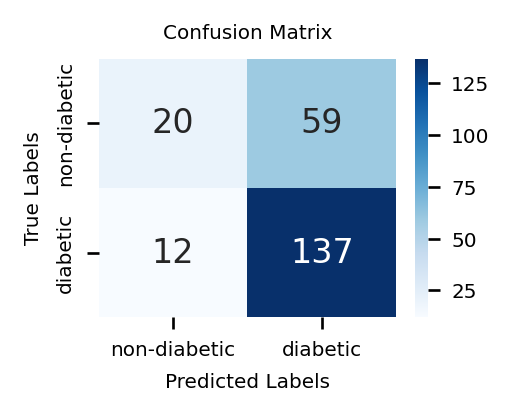

In [ ]:
# Calculate and display the confusion matrix for the Perceptron classifier
calculate_conf_matrix(y_test, pred_perceptron)

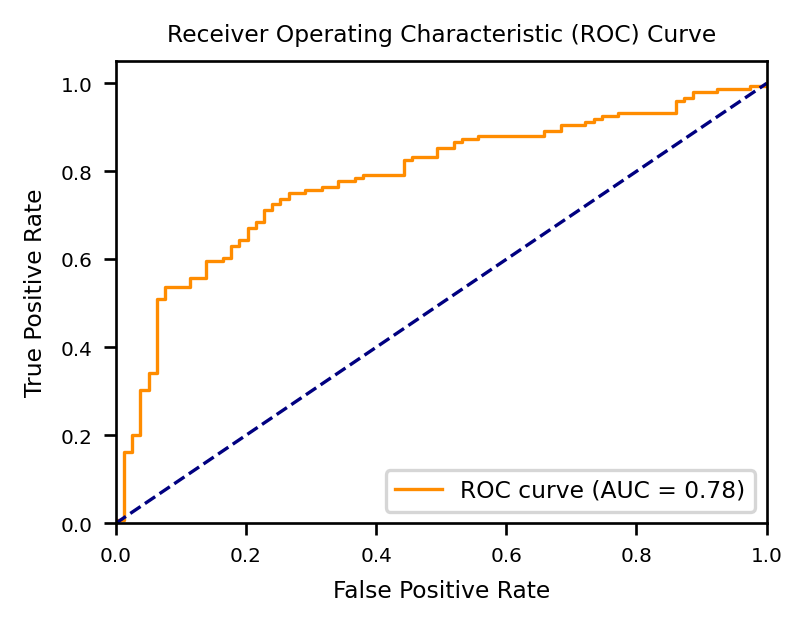

In [ ]:
# Construct ROC curve for the Perceptron classifier
construct_roc(y_test, y_scores)


<br>

<br/>

## 5.2. Optimised Perceptron (Choosing Best Hyper-Parameters)

In [ ]:
# The provided code snippet performs several tasks related to evaluating a trained Perceptron model on a test dataset.
# First, it uses the trained model to make predictions on the test data,
# storing these predictions in the variable `pred_perceptron`.
# Then, it calculates and displays various evaluation metrics for the Perceptron classifier,
# including the balanced accuracy and F1 score.
# Additionally, it computes the Receiver Operating Characteristic Area Under the Curve (ROC AUC) and prints these metrics.
# Finally, the code appends the performance information of the optimized Perceptron model to a DataFrame named `test_data_performance`.
# This snippet essentially evaluates the model's performance on the test data and records the results for further analysis.

# Make predictions on the test data using the trained Perceptron model
pred_perceptron = opt_perceptron.predict(X_test)

# Display evaluation metrics for the Perceptron classifier on the test data
print("Test evaluation metrics for Perceptron:\n")
balanced_acc,f1 = calculate_metrics(y_test, pred_perceptron)

# Get predicted probabilities for class 1 (positive class)
y_scores_opt = opt_perceptron.decision_function(X_test)
auc = get_auc(y_test, y_scores_opt)

# Print the calculated evaluation metrics
print("Balanced Accuracy:", balanced_acc)
print("F1 Score:", f1)
print("ROC AUC:", auc)

# Append the model information to the dataframe
test_data_performance.loc[len(test_data_performance)] = ["Optimised_Perceptron", balanced_acc, f1, auc]

Test evaluation metrics for Perceptron:

Balanced Accuracy: 0.61537
F1 Score: 0.81159
ROC AUC: 0.79517


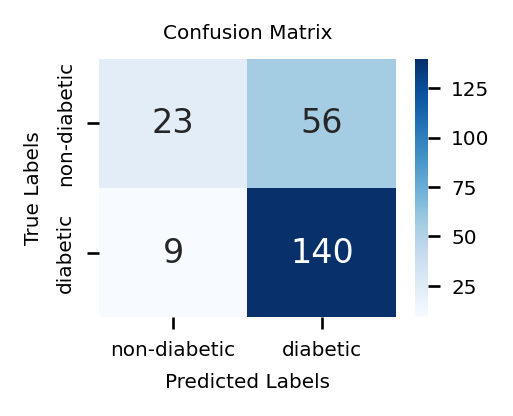

In [ ]:
# Calculate and display the confusion matrix for the Perceptron classifier
calculate_conf_matrix(y_test, pred_perceptron)

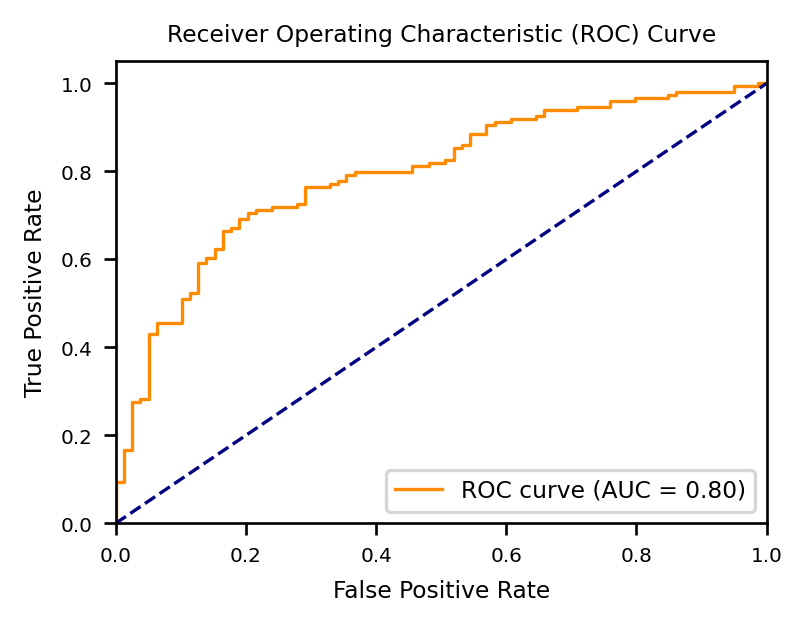

In [ ]:
# Construct ROC curve for the optimised Perceptron classifier
construct_roc(y_test, y_scores_opt)


<br/>

<br/>

## 5.3. Multi Layer Perceptron

In [ ]:
# In the provided code, the Multi Layer Perceptron (MLP) model is applied to make predictions on the test dataset (X_test).
# It computes evaluation metrics, including balanced accuracy and F1 score,
# by comparing the predicted values (pred_ml_perceptron) to the true labels (y_test) for the test data.
# Additionally, it calculates the Receiver Operating Characteristic Area Under the Curve (ROC AUC)
# by utilizing predicted probabilities for class 1 (positive class) generated by the MLP model (y_scores_mlp).
# The code then prints these evaluation metrics and appends them, along with the model name,
# to a dataframe named 'test_data_performance,' which presumably stores performance metrics for various models on the test data.

# Make predictions on the test data using the trained Multi Layer Perceptron model
pred_ml_perceptron = ml_perceptron.predict(X_test)

# Display evaluation metrics for the Multi Layer Perceptron classifier on the test data
print("Test evaluation metrics for Multi Layer Perceptron:\n")
balanced_acc,f1 = calculate_metrics(y_test, pred_ml_perceptron)

# Get predicted probabilities for class 1 (positive class)
y_scores_mlp = ml_perceptron.predict_proba(X_test)[:, 1]
auc = get_auc(y_test, y_scores_mlp)

# Print the calculated evaluation metrics
print("Balanced Accuracy:", balanced_acc)
print("F1 Score:", f1)
print("ROC AUC:", auc)

# Append the model information to the dataframe
test_data_performance.loc[len(test_data_performance)] = ["Multi_Layer_Perceptron", balanced_acc, f1, auc]

Test evaluation metrics for Multi Layer Perceptron:

Balanced Accuracy: 0.70427
F1 Score: 0.81169
ROC AUC: 0.82584


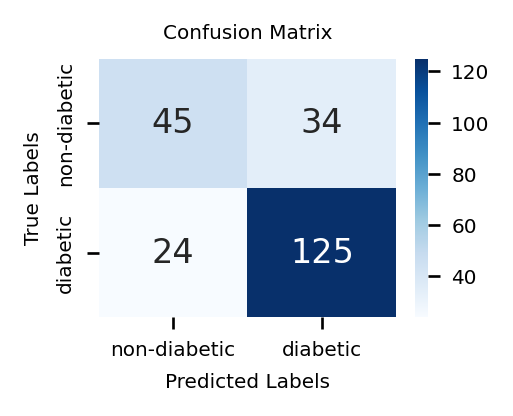

In [ ]:
# Calculate and display the confusion matrix for the Multi Layer Perceptron classifier
calculate_conf_matrix(y_test, pred_ml_perceptron)

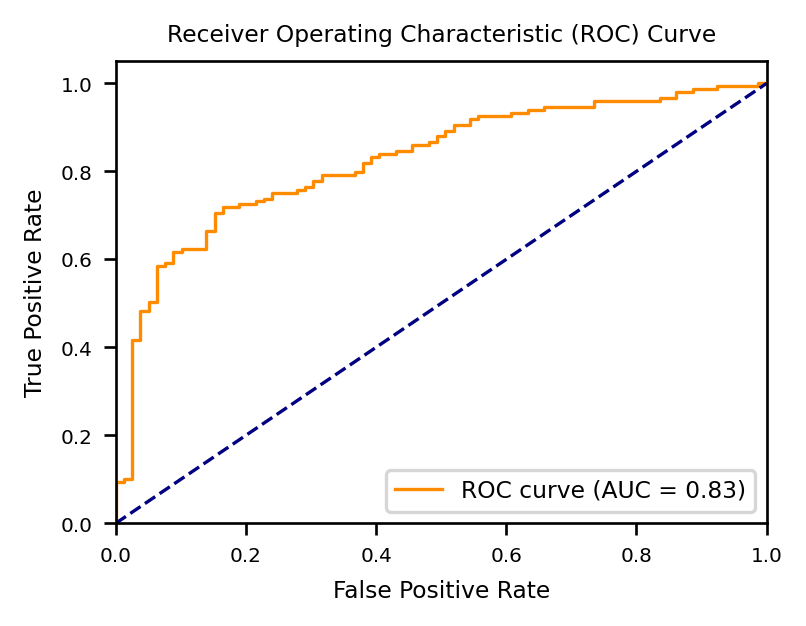

In [ ]:
# Construct the ROC curve for the Multi Layer Perceptron classifier
construct_roc(y_test, y_scores_mlp)


<br/>

<br/>

# 6. Performance Comparision

##

In [ ]:
# Display the model performance information
train_data_performance

,model,balanced_accuracy,f1_score,auc
0,Perceptron,0.60339,0.81273,0.82154
1,Optimised_Perceptron,0.62418,0.82497,0.83487
2,Multi_Layer_Perceptron,0.76479,0.85832,0.86148


In [ ]:
# Display the model test performance information
test_data_performance

,model,balanced_accuracy,f1_score,auc
0,Perceptron,0.58631,0.79420,0.78345
1,Optimised_Perceptron,0.61537,0.81159,0.79517
2,Multi_Layer_Perceptron,0.70427,0.81169,0.82584


In [ ]:
# Sort the DataFrame based on the test balanced accuracy in descending order
sorted_models = test_data_performance.sort_values(by=['balanced_accuracy'], ascending=False)
sorted_models

,model,balanced_accuracy,f1_score,auc
2,Multi_Layer_Perceptron,0.70427,0.81169,0.82584
1,Optimised_Perceptron,0.61537,0.81159,0.79517
0,Perceptron,0.58631,0.79420,0.78345


**Analysis:**

Among the three models evaluated, MultiLayer Perceptron demonstrates superior performance compared to the Perceptron model in both training and test datasets. MultiLayer Perceptron achieves the highest balanced accuracy, F1 score, and AUC values, indicating its ability to effectively classify the data and make accurate predictions. Optimised Perceptron also outperforms the basic Perceptron, particularly in terms of balanced accuracy and AUC, showcasing the benefits of optimisation. In contrast, the standard Perceptron lags behind in terms of all three metrics in both training and test datasets, highlighting its limitations in handling the complexity of the data compared to the more advanced Multi-Layer Perceptron and Optimised Perceptron models.

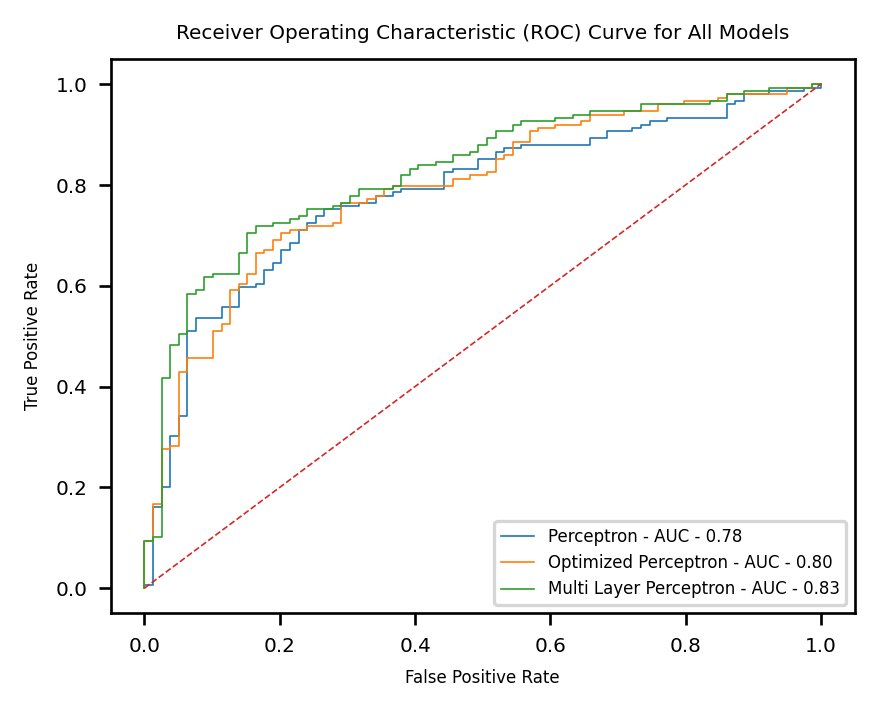

In [ ]:
# Combine the predicted scores from different models into a list
y_test_pred = [y_scores, y_scores_opt, y_scores_mlp]

# Plot ROC curves for the combined predicted scores using the plot_ROC_curves function
plot_ROC_curves(y_test_pred)

**Analysis:**

From above, we observe that the Multi Layer Classifier, depicted by the green line, exhibits the largest coverage area among the three models, establishing its superiority. The Optimised Perceptron outperformed the standard Perceptron, which achieved the lowest performance among the three models.